In [1]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt


---

##### Display Fn

In [2]:
def printer(iterable:list|dict):
    if isinstance(iterable,list):
        print("List".center(16,"-"))
        for item in iterable:
            print(f" - {item}")
        print()
    elif isinstance(iterable,dict):
        print("Dictionary".center(16,"-"))
        
        for key in list(iterable.keys()):
            print(f" {key} :",iterable[key])
        print()


###  Data Processing
---

In [4]:
 #? Defining File paths

path = './Dataset2'

def pad_to_Square(image):
    width, height = image.size
    max_side = max(width,height)
    left_pad = (max_side-width)//2
    right_pad = (max_side-width-left_pad)
    top_pad = (max_side-height)//2
    bot_pad = (max_side-height - top_pad)

    padded_image = transforms.functional.pad(image, (left_pad, top_pad, right_pad, bot_pad), padding_mode='constant', fill=0)
    return padded_image

In [ ]:
 #? Getting the mean and std of the image dataset

initial_Transform = transforms.Compose([
    transforms.Lambda(pad_to_Square),
    transforms.Resize((256, 256)),  # Resize images
    transforms.ToTensor(),  # Convert images to tensor
])

# Load dataset
dataset = datasets.ImageFolder(root=path, transform=initial_Transform)
loader = DataLoader(dataset, batch_size=32, shuffle=False)       #? num_workers indicate the number of parallel processes

# Initialize sums
mean = 0.
std = 0.
total_images = 0

print("dataset:", dataset)
# print("Loader:", loader)
batch = 0
print(f"Total Batches: {len(loader)}")
# for images, labels in loader:
#     print(len(images), len(labels))
#     break
# print("end")
for images, _ in loader:

    batch_samples = images.size(0)  # batch size
    images = images.view(batch_samples, images.size(1), -1)  # flatten H and W
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images += batch_samples
    batch += 1
    print(f"Batch [{batch}/{len(loader)}]".ljust(60), end="\r")
print()

mean /= total_images
std /= total_images

print(f"Mean: {mean}")
print(f"Std: {std}")


dataset: Dataset ImageFolder
    Number of datapoints: 27153
    Root location: ./Dataset2
    StandardTransform
Transform: Compose(
               Lambda()
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Total Batches: 849
Batch [849/849]                                             
Mean: tensor([0.5246, 0.3976, 0.3844])
Std: tensor([0.2746, 0.2190, 0.2167])


In [5]:
 #? Original mean and std from GPT
# mean1 = torch.tensor([0.485, 0.456, 0.406])
# std1 = torch.tensor([0.229, 0.224, 0.225])

#? obtained from previous Cell.
mean = torch.tensor([0.5246, 0.3976, 0.3844])
std = torch.tensor([0.2746, 0.2190, 0.2167])


transform2 = transforms.Compose([
    transforms.Lambda(pad_to_Square),
    transforms.Resize((256, 256)),  # Resize images
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Normalize(mean=mean, std=std),  # Normalize images
])

# Load dataset from directory
dataset = datasets.ImageFolder(root=path, transform=transform2)
print(dataset, len(dataset))
# Create a DataLoader
# dataloader_main = DataLoader(dataset, shuffle=True)
dataloader_main = DataLoader(dataset, batch_size=16, shuffle=True)
print(len(dataloader_main))



Dataset ImageFolder
    Number of datapoints: 27153
    Root location: ./Dataset2
    StandardTransform
Transform: Compose(
               Lambda()
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=tensor([0.5246, 0.3976, 0.3844]), std=tensor([0.2746, 0.2190, 0.2167]))
           ) 27153
1698


##### getting the Names of the Classification
---

In [6]:
folderNames = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]

cleanedNames = []
for idx in range(len(folderNames)):
    words = folderNames[idx].split()
    words.pop(0)
    words.pop()
    if "-" in words:
        words.pop(words.index("-"))

    out = " ".join(words)
    cleanedNames.append(out)

printer(cleanedNames)


classMapping = {}
for index, value in enumerate(cleanedNames):
    classMapping[index] = value

printer(classMapping)
print(len(classMapping))


------List------
 - Eczema
 - Warts Molluscum and other Viral Infections
 - Melanoma
 - Atopic Dermatitis
 - Basal Cell Carcinoma (BCC)
 - Melanocytic Nevi (NV)
 - Benign Keratosis-like Lesions (BKL)
 - Psoriasis pictures Lichen Planus and related diseases
 - Seborrheic Keratoses and other Benign Tumors
 - Tinea Ringworm Candidiasis and other Fungal Infections

---Dictionary---
 0 : Eczema
 1 : Warts Molluscum and other Viral Infections
 2 : Melanoma
 3 : Atopic Dermatitis
 4 : Basal Cell Carcinoma (BCC)
 5 : Melanocytic Nevi (NV)
 6 : Benign Keratosis-like Lesions (BKL)
 7 : Psoriasis pictures Lichen Planus and related diseases
 8 : Seborrheic Keratoses and other Benign Tumors
 9 : Tinea Ringworm Candidiasis and other Fungal Infections

10



##### Comparison of normalized vs original images
---

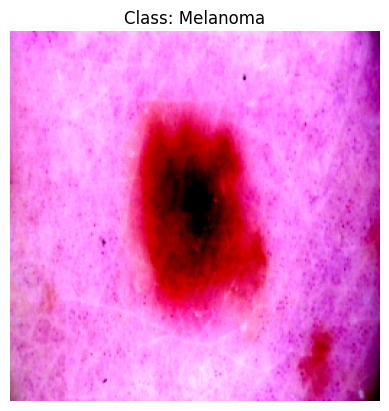

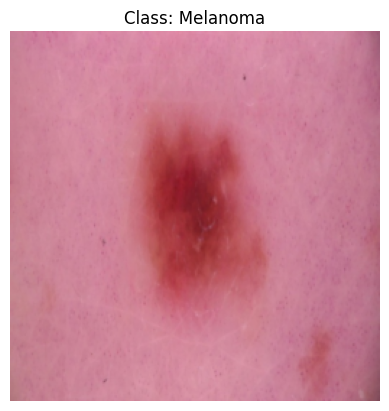

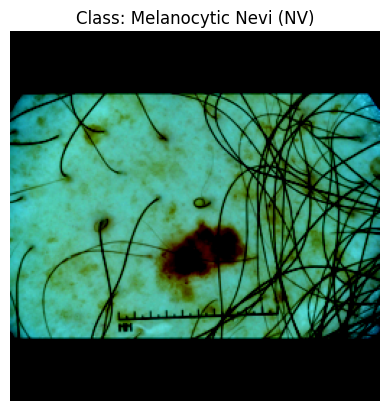

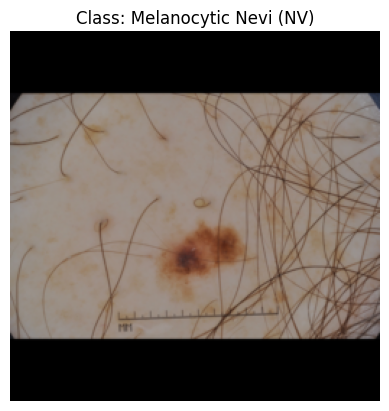

Skipping rest of batch


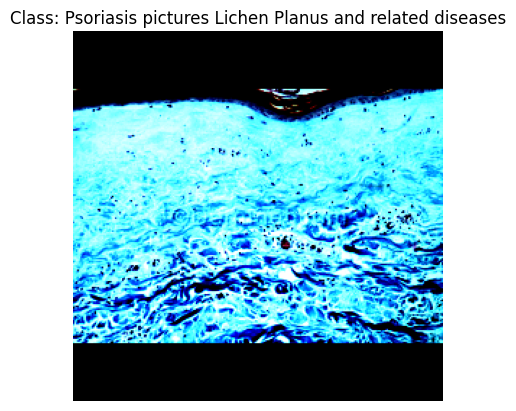

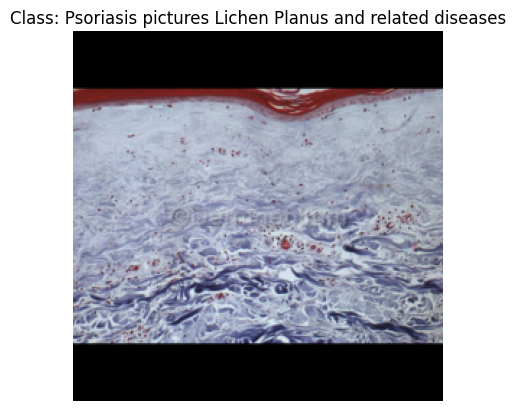

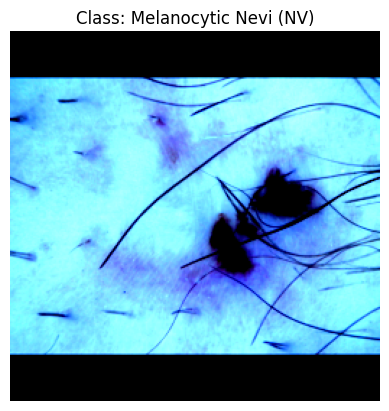

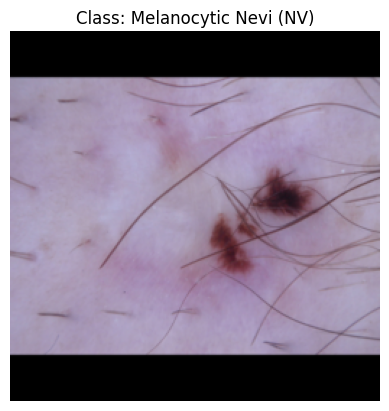

Skipping rest of batch


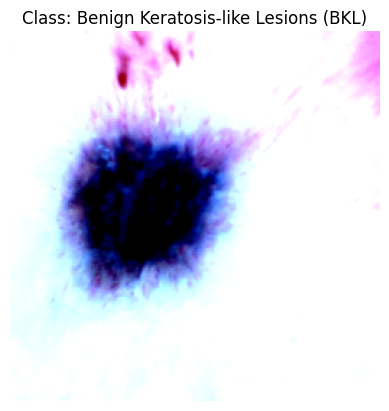

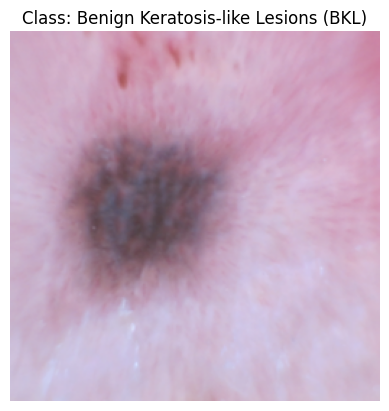

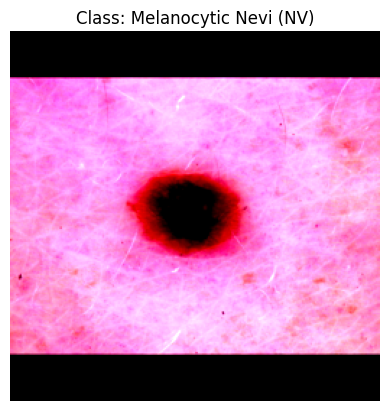

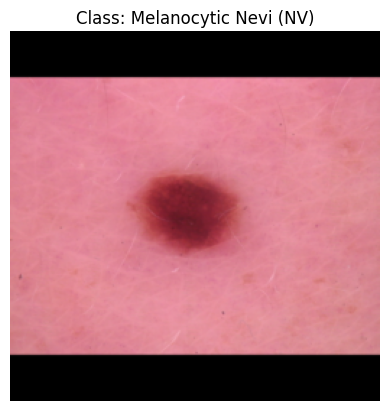

Skipping rest of batch
- END -


In [9]:
count = 0
for batch, labels in dataloader_main:

    # print("Batch Shape:", batch.shape)
    # print(len(batch))
    # print("Labels Shape:", labels.shape)
    # print(len(labels))
    # print(batch[0])
    # print(labels[0])

    if count >= 5:
        print("- END -")
        break

    for image,label in zip(batch,labels):

        #? Convert the tensor to numpy and permute the channels (H.W.C)
        image_tensor = image.permute(1,2,0).numpy()

        #? Clip the values to the range [0, 1] (in case of normalization)
        image_tensor = np.clip(image_tensor, 0, 1)

        #? Plot the image using matplotlib
        plt.imshow(image_tensor)
        plt.axis('off')  # Hide axes
        plt.title(f"Class: {classMapping[label.item()]}")
        plt.show()

        #? Show Original Image
        unnormalize = transforms.Normalize(mean=-mean / std, std=1.0 / std)
        image_tensor = unnormalize(image)
   
        #? Convert the tensor to numpy and permute the channels (H.W.C)
        image_tensor = image_tensor.permute(1,2,0).numpy()

        #? Clip the values to the range [0, 1] (in case of normalization)
        image_tensor = np.clip(image_tensor, 0, 1)

        #? Plot the image using matplotlib
        plt.imshow(image_tensor)
        plt.axis('off')  # Hide axes
        plt.title(f"Class: {classMapping[label.item()]}")
        plt.show()
        
        count += 1
        if count%2 == 0:
            print("Skipping rest of batch")
            break

        

##### Training, Validation, Test Split
---

* This code isnt working now as i have not been able to split the dataset into __input__ and __Labels__

ive tried to make it into a single batch but theres too much data loaded into memory.

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

randomState = 42

# Step 1: Split data into train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=randomState)

# Step 2: Split temp into validation (50% of temp = 10% of total) and test (50% of temp = 10% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=randomState)




Testing another way to shuffle the data beofre solitting them into train test split.

In [ ]:
# Assume your dataset is already loaded
dataset = datasets.ImageFolder(root=path, transform=transform)

# Shuffle the dataset manually
indices = torch.randperm(len(dataset)).tolist()  # Generates a shuffled list of indices

# Now use these shuffled indices to split
train_size = int(0.7 * len(dataset))  # 80% for training
vali_size = (len(dataset) - train_size)//2  # 15% for validation
test_size = len(dataset) - train_size - vali_size  # 15% for testing

train_indices = indices[:train_size]
vali_indices = indices[train_size:train_size+vali_size]
test_indices = indices[train_size+vali_size:]

# Create subsets of the dataset using the shuffled indices
train_subset = torch.utils.data.Subset(dataset, train_indices)
vali_subset = torch.utils.data.Subset(dataset, vali_indices)
test_subset = torch.utils.data.Subset(dataset, test_indices)

# Create DataLoader for each split
train_dataloader = DataLoader(train_subset, shuffle=True, batch_size=32)
vali_dataloader = DataLoader(vali_subset, shuffle=True, batch_size=32)
test_dataloader = DataLoader(test_subset, shuffle=False, batch_size=32)


### Model Building
---

In [ ]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim


In [114]:
efficientNet_model = models.efficientnet_b0()
print(efficientNet_model)

for param in efficientNet_model.parameters():
    param.requires_grad = False

print("Conv2d layers:",len([layer for layer in efficientNet_model.modules() if isinstance(layer, nn.Conv2d)]))
print("FC layers:",len([layer for layer in efficientNet_model.modules() if isinstance(layer, nn.Linear)]))

# for layer in efficientNet_model.layers:
#     print(layer)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

Changing Output layers to fit the dataset

In [ ]:
print(efficientNet_model.classifier)
last2_features = efficientNet_model.classifier[-1].in_features
print(last2_features)

efficientNet_model.classifier[-1] = nn.Linear(last2_features,len(classMapping))
print(efficientNet_model.classifier)


Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)
1280
Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=10, bias=True)
)


Unfreezing the classification layer to train the model

In [ ]:
for param in efficientNet_model.classifier.parameters():
    param.requires_grad = True  # Allow gradients for the classifier


Optimizer & Criterion Selection

In [ ]:
optimizer = optim.Adam(efficientNet_model.parameters(), lr= 0.001) 
criterion = nn.CrossEntropyLoss()


Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=10, bias=True)
)


Device Selection

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "CPU")
efficientNet_model = efficientNet_model.to(device)


Training Loop

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():  # Turn off gradient calculation during validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    # Print the metrics
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {running_loss/len(train_loader):.4f}, "
          f"Train Accuracy: {100 * correct/total:.2f}%, "
          f"Val Loss: {val_loss/len(val_loader):.4f}, "
          f"Val Accuracy: {100 * val_correct/val_total:.2f}%")


---
#### ignore


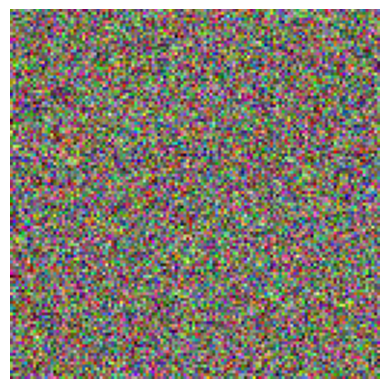

In [ ]:
image_tensor = torch.randn(3, 128, 128)  # Random image with 3 channels and size 128x128

# If the image tensor was normalized, we should unnormalize it (reverse normalization)
# Typically, the normalization values for ImageNet are:
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

# Undo the normalization
unnormalize = transforms.Normalize(mean=-mean / std, std=1.0 / std)
image_tensor = unnormalize(image_tensor)

# Convert the tensor to numpy and permute the channels
image_tensor = image_tensor.permute(1, 2, 0).numpy()

# Clip the values to the range [0, 1] (in case of normalization)
image_tensor = np.clip(image_tensor, 0, 1)

# Plot the image using matplotlib
plt.imshow(image_tensor)
plt.axis('off')  # Hide axes
plt.show()
